<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/ml04_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning(기계 학습)

사람의 지도가 필요한 지 여부에 따라서
* 지도학습(supervised learning) : 레이블이 있는 데이터를 학습
  * 분류(classification) : 클래스를 분류
    * 예 : 도미-빙어, setosa-versicolor-virginica, ...
  * 회귀(regression): 숫자를 예측.
    * 예 : 주가 예측, 집값 예측, ...
* 비지도학습(unsupervised learning) : 레이블이 없는 데이터를 학습


# 문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 물고기의 다른 특성을 이용해서 예측

* Perch(농어) 의 무게 예측
  * 무게를 길이만으로 예측 : Weight ~ Length
  * 무게를 다른 모든 특성들을 사용해서 예측 : Weight ~ Length + Diagonal + Height + Width

* 용어:
  * 예측하고자 하는 값 : 타겟, 레이블, 관심 변수, 종속 변수
  * 예측하기 위해서 필요한 값(변수) : 특성(Feature), 독립변수

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PolynomialFeatures # 다차항을 생성해 주는 변환기
from sklearn.pipeline import Pipeline # 변환기와 추정기를 연결해주는 클래스.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 이용한 수치 예측
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # 선형 회귀를 사용한 숫자 예측

In [3]:
fish_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/fish.csv'

In [4]:
fish_df = pd.read_csv(fish_csv)

In [5]:
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
perch = fish_df[fish_df.Species == 'Perch']

In [7]:
perch

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415
77,Perch,100.0,18.0,19.2,5.2224,3.3216
78,Perch,78.0,18.7,19.4,5.1992,3.1234
79,Perch,80.0,19.0,20.2,5.6358,3.0502
80,Perch,85.0,19.6,20.8,5.1376,3.0368
81,Perch,85.0,20.0,21.0,5.0820,2.7720


In [8]:
# X: 특성 (2차원) 배열. 길이만 선택. (n_samples, n_features) = (56, 1)
# y: 타겟 (1차원) 배열. 레이블. 무게. (n_samples,) = (56,)
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [9]:
X = perch[['Length']].values
X

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [10]:
y = perch['Weight'].values

In [11]:
y

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [12]:
X.shape

(56, 1)

In [13]:
y.shape

(56,)

# 훈련 셋(75%), 테스트 셋(25%) 분리



In [14]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.25, random_state=42, shuffle=True)

# random sampling, 회귀 분석에서는 층화추출은 없음. 임의 추출만.

In [15]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

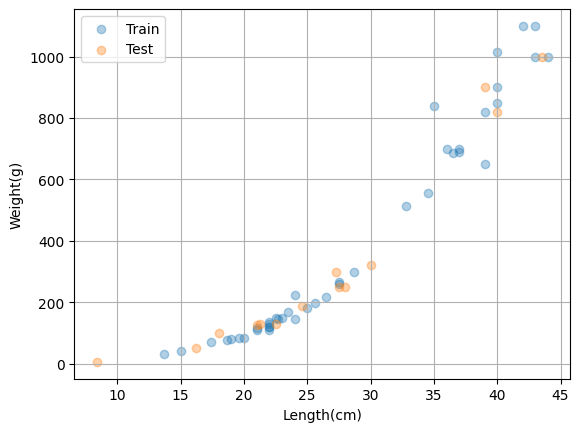

In [16]:
# 훈련 셋 시각화(Weight ~ Length)

plt.scatter(x=X_tr.ravel(),y=y_tr, label='Train', alpha=0.35) # ravel = 뷰, flatten은 원본에서 복사해온 것.
plt.scatter(x=X_te.ravel(),y=y_te, label='Test', alpha=0.35)
plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')

plt.show()

# KNN Regressor 모델을 훈련, 평가.

1. KNN Regressor 객체 생성.
1. KNN Regressor 훈련 셋으로 학습
1. 훈련 셋의 예측값 계산, 실젯값과 비교.
1. 테스트 셋의 예측값 계산, 실젯값과 비교.

In [17]:
knn = KNeighborsRegressor()

In [18]:
knn.fit(X_tr,y_tr)

KNeighborsRegressor()

In [19]:
y_pred_tr = knn.predict(X_tr)

In [20]:
y_pred_tr

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [21]:
y_tr

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [22]:
y_pred = knn.predict(X_te)

In [23]:
y_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [24]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [25]:
np.mean(y_pred==y_te)

0.0

In [26]:
np.mean(y_pred_tr==y_tr)

0.0

KNN(K-Nearest Neighbors) 회귀(regression) :

k개의 가장 가까운 이웃(훈련 셋 샘플)들을 찾아서, 샘플들의 평균으로 숫자를 예측하는 머신러닝 모델.

In [30]:
indices = knn.kneighbors(X_tr[0].reshape((1,-1)),return_distance=False)

In [31]:
indices

array([[ 0, 10, 36,  2, 17]])

In [32]:
# 인덱스 0번 샘플에서 가장 가까운 이웃 5개의 무게들

y_tr[indices]

array([[ 85.,  85.,  80.,  78., 115.]])

In [33]:
np.mean(y_tr[indices])

88.6

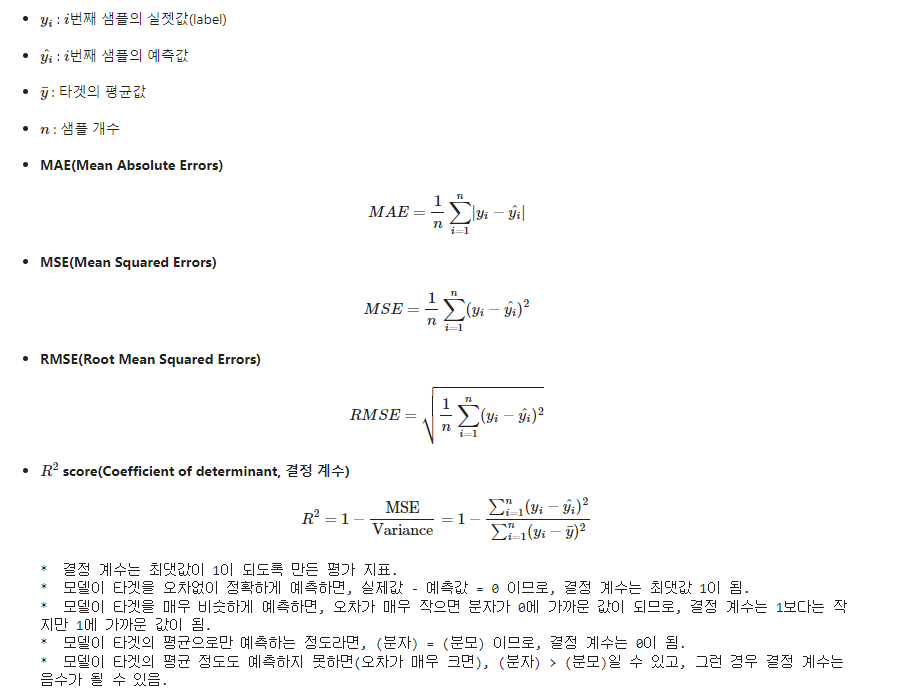

In [36]:
# 훈련 셋의 MAE

mean_absolute_error(y_tr, y_pred_tr)

35.76190476190476

In [38]:
# 훈련 셋의 MSE

xxx= mean_squared_error(y_tr, y_pred_tr)
xxx

3716.5161904761903

In [42]:
np.sqrt(xxx)

60.96323638453089

In [44]:
# 훈련 셋의 R2 Score(결정 계수)
r2_score(y_tr, y_pred_tr)

0.9698823289099254

scikit-learn 패키지의 모든 ML 알고리즘 클래스들은 평가 점수를 리턴하는 메서드(`score()`)를 갖고 있음.

* score 메서드는 argument로 전달된 특성 배열(X)로 예측값을 먼저 계산하고, argument로 전달된 타겟(y) 와 비교해서 평가점수를 계산.
* 분류 : 정확도(accuracy)
* 회귀 : 결정계수


In [46]:
# score

knn.score(X_tr, y_tr)

0.9698823289099254

In [47]:
mse_te = mean_squared_error(y_te, y_pred)

In [48]:
mse_te

721.7385714285714

In [49]:
np.sqrt(mse_te)

26.865192562655704

In [50]:
r2_score(y_te, y_pred) # 테스트셋 결정계수

0.992809406101064

# 선형 회귀(Linear Regression)

머신 러닝 알고리즘 :

* 사례 기반 학습 ( instance-based learning ) :
  * KNN, Decision Tree, ...
  * 수학적인 모델을 만들지 않고, 훈련 셋의 데이터 특성들을 사용해서 예측.
  * outlier(이상치)들이 많은 경우에는 성능이 나빠질 수 있음.

* 모델 기반 학습 ( model-based learning ) :
  * Logistic Regression, Linear Regression, ...
  * 훈련 셋을 사용해서 수학적인 모델을 만들고, 그 모델을 사용해서 예측.

* 선형 회귀 학습이란

  $$
  y = a * x + b
  $$

  수학 모델에서, MSE가 최소가 되도록 하는 직선 기울기(a)와 y절편(b)를 찾는 과정.

## 선형 회귀 모델 생성

In [53]:
lin_reg = LinearRegression()

In [54]:
## 훈련셋으로 모델 학습

lin_reg.fit(X_tr, y_tr) # 학습 -> 직선의 방정식에서 기울기(coefficient)와 y절편(intercept) 을 찾음.

LinearRegression()

In [55]:
lin_reg.predict(X_tr)

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [56]:
lin_reg.coef_

array([39.01714496])

In [57]:
lin_reg.intercept_

-709.0186449535477

$$
  weight = 39.017 \times length - 709.018
$$

## 선형 회귀에서 훈련 셋 예측 결과 평가

In [60]:
y_tr_pred = lin_reg.predict(X_tr)

In [61]:
print(y_tr_pred)

[  55.71739633  149.35854425   20.60196587  -30.12032259  695.59857374
  266.40997914  851.66715359  812.65000863  968.71858848  149.35854425
   71.32425432  149.35854425  227.39283417  363.95284155  968.71858848
  851.66715359  227.39283417  110.34139928  363.95284155  851.66715359
  570.74370985  324.93569658  715.10714622 -174.48375895  176.67054572
 -123.7614705   734.6157187   656.58142877  410.7734155   207.88426169
  812.65000863  110.34139928  188.37568921  149.35854425 1007.73573345
  168.86711673   32.30710936  734.6157187   149.35854425  289.82026612
  929.70144352  637.07285629]


In [62]:
mean_squared_error(y_tr, y_tr_pred)
# KNN에서 MSE 보다 큼 -> Linear Regression의 성능이 KNN보다 나쁘다.

7422.953552609781

In [63]:
r2_score(y_tr, y_tr_pred)

0.939846333997604

## 테스트 셋 예측 결과를 평가

In [64]:
y_te_pred = lin_reg.predict(X_te)

In [65]:
print(y_te_pred)

[-381.27462726   -6.71003561  363.95284155  122.04654277  168.86711673
  851.66715359  461.49570396  250.80312115  812.65000863  110.34139928
  988.22716096  -76.94089654  383.46141403  356.14941255]


In [67]:
print(y_te)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [68]:
mean_squared_error(y_te, y_te_pred)

17590.265977889187

In [69]:
r2_score(y_te, y_te_pred)

0.8247503123313558

## 훈련 셋, 테스트 셋, 선형 회귀 방정식 시각화.

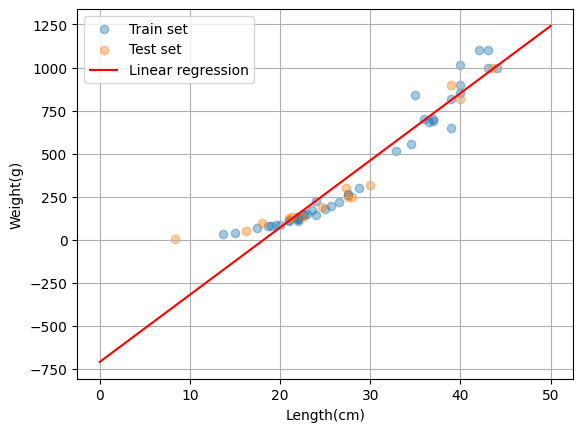

In [82]:
# 훈련 셋 시각화
plt.scatter(X_tr.ravel(), y_tr, alpha=0.4, label='Train set')
# 테스트 셋 시각화
plt.scatter(X_te.ravel(), y_te, alpha=0.4, label='Test set')
# 선형 회귀 방정식 시각화
x = np.arange(0,50,0.01) # [0 0.01... 44.99]
a = lin_reg.coef_[0]
b = lin_reg.intercept_
y1 = a * x + b # 선형 회귀 방정식
plt.plot(x,y1,'r-',label='Linear regression')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.grid()
plt.legend()

2차 항을 포함하는 선형 회귀

In [84]:
X_tr[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [86]:
X_tr_poly = np.c_[X_tr ** 2, X_tr] # Length의 2차항을 포함하는 특성배열
X_tr_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

## 선형 회귀 모델 생성

In [87]:
lin_reg = LinearRegression()

## 2차항을 포함하는 훈련셋으로 학습

In [88]:
lin_reg.fit(X_tr_poly, y_tr)

LinearRegression()

In [89]:
lin_reg.coef_

array([  1.01433211, -21.55792498])

In [90]:
lin_reg.intercept_

116.0502107827827

$$
  weight = 1.01 \times length^2 - 21.55 \times length + 116.05
$$

## 훈련셋의 예측 결과를 평가

In [92]:
y_tr_pred = lin_reg.predict(X_tr_poly)

In [93]:
print(y_tr_pred)

[  83.18070434  132.71260219   67.61880901   48.04150559  654.5393253
  211.05965467  876.66458663  818.09027497 1064.55950693  132.71260219
   90.62455496  132.71260219  182.91530629  290.29593158 1064.55950693
  876.66458663  182.91530629  110.65424646  290.29593158  876.66458663
  500.20932803  257.07992265  680.52990177   11.08663218  149.3605064
   20.90606071  707.0276443   604.07967051  332.83297906  169.60388118
  818.09027497  110.65424646  156.79962213  132.71260219 1131.24847547
  144.50252913   72.62352767  707.0276443   132.71260219  228.92002253
  999.89920261  579.6105922 ]


In [94]:
mean_squared_error(y_tr, y_tr_pred)

3617.9917403639624

In [95]:
r2_score(y_tr, y_tr_pred)

0.9706807451768623

## 테스트셋의 예측 결과를 평가

In [97]:
X_te_poly = np.c_[X_te **2 , X_te]

In [98]:
y_te_pred = lin_reg.predict(X_te_poly)

In [99]:
print(y_te_pred)

[   6.5349146    56.6511646   290.29593158  117.05874344  144.50252913
  876.66458663  382.21135986  199.55847561  818.09027497  110.65424646
 1097.65040817   33.01314491  307.66468513  283.49043666]


In [100]:
mean_squared_error(y_te,y_te_pred)

2248.9974694392704

In [101]:
r2_score(y_te,y_te_pred)
#> 훈련 셋의 결정 계수와 비슷 - 과대, 과소 적합이 적음.

0.9775935108325122

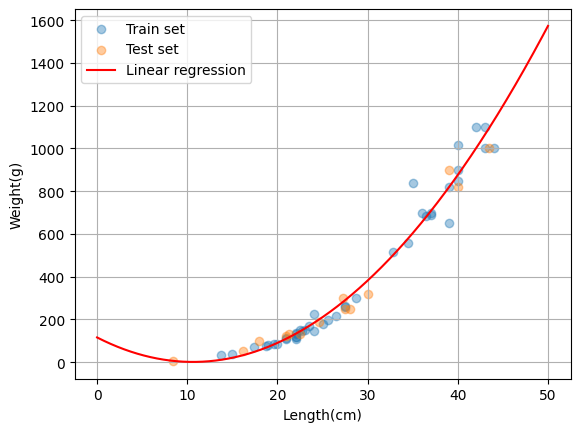

In [103]:
# 훈련 셋 시각화
plt.scatter(X_tr.ravel(), y_tr, alpha=0.4, label='Train set')
# 테스트 셋 시각화
plt.scatter(X_te.ravel(), y_te, alpha=0.4, label='Test set')
# 선형 회귀 방정식 시각화
x = np.arange(0,50,0.01) # [0 0.01... 44.99]
a = lin_reg.coef_[0]
b = lin_reg.coef_[1]
c = lin_reg.intercept_
y1 = a * (x**2) + b * x + c  # 선형 회귀 방정식
plt.plot(x,y1,'r-',label='Linear regression')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.grid()
plt.legend()

모든 특성들을 사용한 선형 회귀

$$
   y = \Sigma_{i=1}^{n} a_i \times x_i + b
$$

In [104]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [105]:
X = perch.iloc[:, 2:].values

In [107]:
X.shape

(56, 4)

In [108]:
y = perch.iloc[:,1].values

In [109]:
y

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [110]:
y.shape

(56,)

##훈련셋 테스트 셋 분리

In [111]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.25,random_state=42)

## 선형 회귀 모델 생성

In [112]:
lin_reg = LinearRegression()

## 모델 훈련

In [113]:
lin_reg.fit(X_tr,y_tr)

LinearRegression()

In [114]:
lin_reg.coef_

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [115]:
lin_reg.intercept_

-610.0275364260515

## 훈련셋, 테스트 셋 평가 점수

In [116]:
lin_reg.score(X_tr, y_tr) # 훈련 셋 결정 계수

0.9567246116638569

In [117]:
lin_reg.score(X_te, y_te) # 테스트 셋 결정 계수 -> 과대 적합(overfitting)

0.8790465615990273

# 모든 특성들의 2차항까지 고려한 선형 회귀

scikit-learn 패키지의 클래스:

* 변환기(Transformer) :
  * 모델 훈련 전 전처리(preprocessing) 과정에서 특성들을 변환하기 위해서 사용.
  * (예) StandardScaler, MinMaxScaler, PolynomialFeatures, ...
  `fit, transform, fit_transform` 메서드를 가지고 있음.
* 추정기(estimator) :
  * 머신러닝 알고리즘을 구현한 클래스.
  * (예) KNeighborsClassfier, KNeighborsRegressor, LinearRegression, LogisticRegression, ...
  * `fit, predict, score` 메서드를 가지고 있음.

In [120]:
poly = PolynomialFeatures(include_bias=False) # 특성들의 2차항을 만들어주는 변환기

In [121]:
X_tr_poly = poly.fit_transform(X_tr) # 훈련 셋을 변환(2차 항들을 포함)

In [122]:
X_tr_poly.shape

(42, 14)

In [124]:
poly.get_feature_names_out(['length','diagonal','height','width']) # 2차 항이 포함된 컬럼들의 순서

array(['length', 'diagonal', 'height', 'width', 'length^2',
       'length diagonal', 'length height', 'length width', 'diagonal^2',
       'diagonal height', 'diagonal width', 'height^2', 'height width',
       'width^2'], dtype=object)

## Pipeline

변환기와 추정기를 연결해서 항상 같은 순서로 변환을 하고, 예측을 하기 위한 클래스.

In [125]:
pipe = Pipeline([('poly',PolynomialFeatures(include_bias=False)),('reg',LinearRegression())])

In [126]:
pipe.fit(X_tr,y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [132]:
pipe['reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [133]:
pipe['reg'].intercept_

67.36628210104692

### 훈련 셋의 예측값 평가

In [137]:
y_tr_pred = pipe.predict(X_tr) # 훈련 셋 예측값

In [138]:
r2_score(y_tr, y_tr_pred) # 훈련 셋 결정계수

0.9920055538341142

### 테스트 셋 예측 결과 평가

In [139]:
y_te_pred = pipe.predict(X_te)

In [140]:
r2_score(y_te, y_te_pred)

0.949260960155303